In [848]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

In [849]:
raw_data = pd.read_csv("NGC2112.csv")
raw_data

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp
0,3218714702839379840,88.505093,0.070229,0.129563,2.074579,-1.998603,20.278233,2.357429
1,3218714702839805184,88.500415,0.066823,0.174057,0.854342,0.890073,17.860075,1.427671
2,3218714707133982208,88.505425,0.072046,0.478273,0.211525,-1.821900,19.526700,1.955667
3,3218717382902246144,88.431355,0.061653,1.942618,-2.712815,-1.160481,20.721580,2.024649
4,3218717421554260992,88.407088,0.062804,0.323620,0.339548,0.200034,17.412926,1.475685
...,...,...,...,...,...,...,...,...
3995,3218840253324427136,88.624765,0.482933,0.002550,1.146816,0.253082,19.923248,1.983757
3996,3218840257618901376,88.628273,0.479413,0.969706,-2.768778,4.310603,11.011396,2.245569
3997,3218840287683973120,88.599692,0.481341,0.182803,-0.885787,1.223518,18.558136,1.778168
3998,3218840287684247040,88.602277,0.489911,0.419699,-0.065401,-6.950185,20.840492,1.912655


In [850]:
data = raw_data.dropna()
data

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp
0,3218714702839379840,88.505093,0.070229,0.129563,2.074579,-1.998603,20.278233,2.357429
1,3218714702839805184,88.500415,0.066823,0.174057,0.854342,0.890073,17.860075,1.427671
2,3218714707133982208,88.505425,0.072046,0.478273,0.211525,-1.821900,19.526700,1.955667
3,3218717382902246144,88.431355,0.061653,1.942618,-2.712815,-1.160481,20.721580,2.024649
4,3218717421554260992,88.407088,0.062804,0.323620,0.339548,0.200034,17.412926,1.475685
...,...,...,...,...,...,...,...,...
3995,3218840253324427136,88.624765,0.482933,0.002550,1.146816,0.253082,19.923248,1.983757
3996,3218840257618901376,88.628273,0.479413,0.969706,-2.768778,4.310603,11.011396,2.245569
3997,3218840287683973120,88.599692,0.481341,0.182803,-0.885787,1.223518,18.558136,1.778168
3998,3218840287684247040,88.602277,0.489911,0.419699,-0.065401,-6.950185,20.840492,1.912655


In [851]:
data.to_csv("NGC2112_cleaned.csv", index=False)

In [852]:
def normalize(dataset):
    norm_dataset = (dataset - dataset.mean())/dataset.std()
    return norm_dataset

In [853]:
cleaned_data = pd.read_csv("NGC2112_cleaned.csv")
norm_data = normalize(cleaned_data)

In [854]:
gmm = GMM(n_components=2, covariance_type="full")
gmm.fit(norm_data)
gmm.converged_

True

In [855]:
labels = gmm.predict(norm_data)
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [856]:
probability = gmm.predict_proba(norm_data)
probability[-2][1]

0.0009956194386871538

In [857]:
norm_data.to_csv("NGC2112_normalized.csv", index=False)

In [858]:
normalized_dataset = pd.read_csv("NGC2112_normalized.csv")
norm_data_updated = normalized_dataset.assign(clusters = labels)
norm_data_updated

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,clusters
0,-2.505212,0.183768,-1.983495,-0.508689,0.400627,-0.146596,0.913947,1.328910,1
1,-2.505212,0.154518,-2.014716,-0.463989,0.117445,0.167723,-0.382838,-1.146126,1
2,-2.505097,0.185842,-1.966836,-0.158364,-0.031735,-0.127369,0.510923,0.259411,1
3,-2.433564,-0.277281,-2.062113,1.312765,-0.710392,-0.055399,1.151701,0.443040,1
4,-2.432531,-0.429010,-2.051561,-0.313734,-0.002024,0.092640,-0.622630,-1.018312,1
...,...,...,...,...,...,...,...,...,...
3613,0.851207,0.932012,1.799963,-0.636291,0.185320,0.098412,0.723580,0.334186,0
3614,0.851322,0.953943,1.767689,0.335345,-0.723379,0.539914,-4.055576,1.031135,0
3615,0.852126,0.775245,1.785361,-0.455203,-0.286390,0.204006,-0.008489,-0.213097,0
3616,0.852126,0.791404,1.863926,-0.217210,-0.096001,-0.685381,1.215470,0.144911,0


In [859]:
labels_df = norm_data_updated.loc[:, "clusters"]
labels_df

0       1
1       1
2       1
3       1
4       1
       ..
3613    0
3614    0
3615    0
3616    0
3617    0
Name: clusters, Length: 3618, dtype: int64

In [860]:
final_dataset = cleaned_data.assign(clusters=labels_df)
final_dataset

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,clusters
0,3218714702839379840,88.505093,0.070229,0.129563,2.074579,-1.998603,20.278233,2.357429,1
1,3218714702839805184,88.500415,0.066823,0.174057,0.854342,0.890073,17.860075,1.427671,1
2,3218714707133982208,88.505425,0.072046,0.478273,0.211525,-1.821900,19.526700,1.955667,1
3,3218717382902246144,88.431355,0.061653,1.942618,-2.712815,-1.160481,20.721580,2.024649,1
4,3218717421554260992,88.407088,0.062804,0.323620,0.339548,0.200034,17.412926,1.475685,1
...,...,...,...,...,...,...,...,...,...
3613,3218840253324427136,88.624765,0.482933,0.002550,1.146816,0.253082,19.923248,1.983757,0
3614,3218840257618901376,88.628273,0.479413,0.969706,-2.768778,4.310603,11.011396,2.245569,0
3615,3218840287683973120,88.599692,0.481341,0.182803,-0.885787,1.223518,18.558136,1.778168,0
3616,3218840287684247040,88.602277,0.489911,0.419699,-0.065401,-6.950185,20.840492,1.912655,0


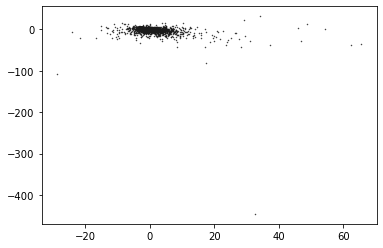

0       -1.998603
1        0.890073
2       -1.821900
3       -1.160481
4        0.200034
          ...    
3540    -6.067275
3571    -2.063898
3586   -11.293305
3587     0.691569
3590   -12.010328
Name: pmdec, Length: 1091, dtype: float64

In [903]:
colors = ["red", 'blue']

for i in range(0,2):
    plot_data = final_dataset[final_dataset.loc[:, "clusters"] == i]
    plt.scatter(plot_data.loc[:, "pmra"], plot_data.loc[:, "pmdec"],s=0.2, cmap="rgb", c="0.1")    
    
plt.show()
plot_data.loc[:, "pmdec"]